# 伽马特性

图像输入输出系统信号的变换特性，一般呈S曲线。如下图2所示：
![](doc_imgs/01.png)
如果使用两对数的情况下，中间部分将呈直线状，如下图2所示：
![](doc_imgs/02.png)
可以使用以下公式描述：
$S_A = kS_B^\gamma$

k和$\gamma$都是系数。一般将图2所示的直线称作伽马($\gamma$,gamma)。如果$\gamma$为1时，$S_A$与$S_B$成比例。如果$\gamma$大于1，则图像是高对比度图像；如果$\gamma$小于1时，表示低亮度图像。当$\gamma \ne 1$变为非线性特性，对图像的灰度级影响很大。

在图像的灰度水平校正上，将$\gamma$的值改变，叫做伽马校正（$\gamma$校正，Gamma Correction）

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.io
import skimage.color

In [11]:
src = skimage.io.imread('../datas/f2.jpg')
gray = skimage.color.rgb2gray(src)

In [12]:
def gamma_correction(src,gamma=2.2):
    dst = np.zeros_like(src)
    lut = np.zeros((256,))
    if gamma < 0.1:
        gamma = -0.1
    if gamma > 5.0:
        gamma = 5.0
        
    for i in range(256):
        lut[i] = ((i / 255.0) ** gamma) * 255.0
    lut = np.clip(lut,0,255)
    lut = np.uint8(lut)
    
    if len(src.shape) > 2:
        dst[:,:,0] = lut[src[:,:,0]]
        dst[:,:,1] = lut[src[:,:,1]]
        dst[:,:,2] = lut[src[:,:,2]]
    else:
        dst = lut[src]
    return np.uint8(dst)

In [13]:
dst = gamma_correction(src)

Text(0.5,1,'Gamma Correction:gamma = 2.2')

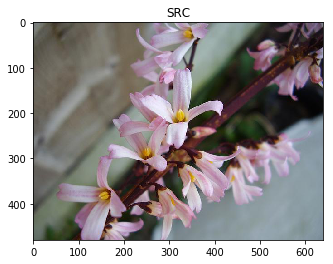

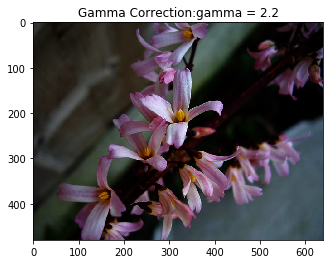

In [14]:
plt.figure()
plt.imshow(src)
plt.title('SRC')
plt.figure()
plt.imshow(dst)
plt.title('Gamma Correction:gamma = 2.2')